In [252]:
import pandas as pd
import gensim
import string
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [251]:
dataset=pd.read_csv('amazon_alexa.tsv',sep='\t')
reviews=dataset.verified_reviews.values
reviews[0]
# dataset.info()
y=dataset.feedback 
pd.hi

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3120    1
3121    1
3122    1
3123    1
3124    1
3125    1
3126    1
3127    1
3128    1
3129    1
3130    1
3131    1
3132    1
3133    1
3134    1
3135    1
3136    1
3137    1
3138    1
3139    1
3140    1
3141    1
3142    1
3143    1
3144    1
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64>

In [221]:
# import string
# import nltk
# # nltk.download()
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from spacy.lang.en.stop_words import STOP_WORDS



# reviw=[]
# for col in reviews:
#     tokens= word_tokenize(col)
#     tokens=[w.lower() for w in tokens]
#     table=str.maketrans('','',string.punctuation)
#     stripped=[w.translate(table) for w in tokens]
#     words=[word for word in stripped if word.isalpha()]
# #     stopwords=set(stopwords.words('english'))
#     words=[w for w in words if not w in STOP_WORDS]
#     reviw.append(words)
# reviw[0]

In [222]:
# import gensim
# from gensim.models import Word2Vec

In [223]:
# models=Word2Vec(sentences=reviw,window=5,workers=4,min_count=1)

In [224]:
# words=list(models.wv.vocab)

# file='modelstest.txt'
# models.wv.save_word2vec_format(file,binary=False)


In [225]:
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [226]:
import re
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [245]:
import spacy


In [246]:
X = []
sentences = list(reviews)
for sen in sentences:
    X.append(preprocess_text(sen))

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [229]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [230]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [231]:
# load the whole embedding into memory
from numpy import asarray
from numpy import zeros
import numpy as np
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
embeddings_dictionary = dict()



embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Loaded 400000 word vectors.


In [232]:
from keras.layers import LSTM
embedding_dim=100
model = Sequential() 
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen, weights=[embedding_matrix]))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2,))
model.add(Dense(1, activation='sigmoid'))

In [233]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [234]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          370300    
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 487,677
Trainable params: 487,677
Non-trainable params: 0
_________________________________________________________________


In [235]:
history=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 2520 samples, validate on 630 samples
Epoch 1/10
2520/2520 [==============================] - 14s 5ms/step - loss: 0.3201 - acc: 0.9099 - val_loss: 0.3097 - val_acc: 0.9079
Epoch 2/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2690 - acc: 0.9234 - val_loss: 0.3021 - val_acc: 0.9095
Epoch 3/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2858 - acc: 0.9242 - val_loss: 0.3051 - val_acc: 0.9111
Epoch 4/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2657 - acc: 0.9282 - val_loss: 0.2976 - val_acc: 0.9111
Epoch 5/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2583 - acc: 0.9290 - val_loss: 0.3083 - val_acc: 0.9111
Epoch 6/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2594 - acc: 0.9198 - val_loss: 0.3153 - val_acc: 0.9079
Epoch 7/10
2520/2520 [==============================] - 11s 4ms/step - loss: 0.2585 - acc: 0.9210 - val_loss: 0.2984 - val_acc: 0.9095
Epoch 8/

In [236]:
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score[0]) 
print('Test accuracy:',score[1])

630/630 [==============================] - 1s 1ms/step
Test loss: 0.2955517749937754
Test accuracy: 0.9111111105434478


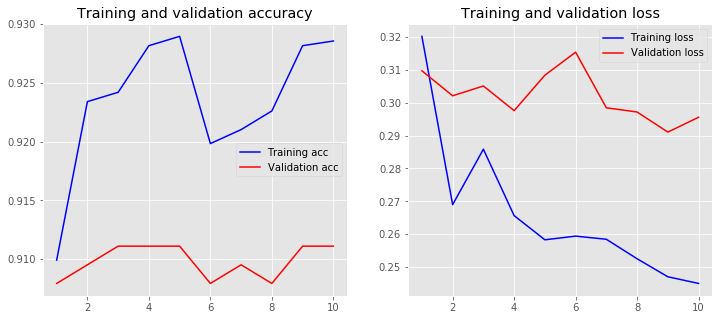

In [237]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [239]:
twt = ['I laughed all the way through this rotten movie It so unbelievable woman leaves her husband after many years of marriage has breakdown in front of real estate office What happens The office manager comes outside and offers her job Hilarious Next thing you know the two women are going at it Yep they re lesbians Nothing rings true in this Lifetime for Women with nothing better to do movie Clunky dialogue like don want to spend the rest of my life feeling like had chance to be happy and didn take it doesn help There a wealthy distant mother who disapproves of her daughter new relationship sassy black maid unbelievable that in the year film gets made in which there a sassy black maid Hattie McDaniel must be turning in her grave The woman has husband who freaks out and wants custody of the snotty teenage kids Sheesh No cliche is left unturned']
#ctorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input


flat_list = []
for sublist in twt:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

twt = pad_sequences(flat_list, maxlen=100,padding='post')

print(twt)
sentiment = model.predict(twt)[0]

sentiment
# if(np.argmax(sentiment) <0.5):
#     print("negative")
# elif (np.argmax(sentiment)>0.5):
#     print("positive")


[[ 723   11  602  441   55  947    1  441  652  646    4 1273   95  702
   385  104   25  139    1  165   47  179   68    2 2849  110  261  406
  2800  978   15    9 3670    7   12  406   78    3   48  520   28   93
   128    3 1018    1 1236   11    5  430   28   65 1280    3   36  204
     4  191  273    2  119  315  105  181  549  288   11   95  289   81
   825 1874   16   15    1  328  383  251   15  107  105  181  825  433
    36  759   15   95    1   52  356  288   72    4   11    1  313   77
     6 1698]]


array([0.9472906], dtype=float32)